Heart Disease Prediction Analysis

In [47]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [48]:
file ="/content/heart.csv"
df= pd.read_csv(file)


In [49]:
df.shape


(303, 14)

In [50]:
df.apply(lambda x: sum(x.isnull()),axis=0)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [52]:
#df= df['oldpeak'].apply(int)
#print(df.dtypes)

In [53]:
# List of variables with missing values
vars_with_na=[var for var in df.columns if df[var].isnull().sum()>1]

for var in vars_with_na:
    print(var, np.round(df[var].isnull().mean(),3), '% missing values')

Boolan variables

In [54]:
bool_var=['sex','output','fbs', 'exng']
# Let's visualize the discrete variables:
df[bool_var].head()



,sex,output,fbs,exng
0,1,1,1,0
1,1,1,0,0
2,0,1,0,0
3,1,1,0,0
4,0,1,0,1


Categorical variables:cardinalty

In [55]:
cat_var=['cp','restecg','slp', 'thall']
# Let's visualize the discrete variables:
df[cat_var].head()


,cp,restecg,slp,thall
0,3,0,0,1
1,2,1,0,2
2,1,0,2,2
3,1,1,2,2
4,0,1,2,2


In [56]:
num_var=['age', 'trtbps','chol', 'thalachh', 'oldpeak', 'caa']
# Let's visualize the discrete variables:
df[num_var].head()


,age,trtbps,chol,thalachh,oldpeak,caa
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0


In [57]:
for var in num_var:
    print(var,len(df[var].unique()),'unique numbers')

age 41 unique numbers
trtbps 49 unique numbers
chol 152 unique numbers
thalachh 91 unique numbers
oldpeak 40 unique numbers
caa 5 unique numbers


target
Target variable: whether the patient has a heart disease or not

Value 0: yes
Value 1: no


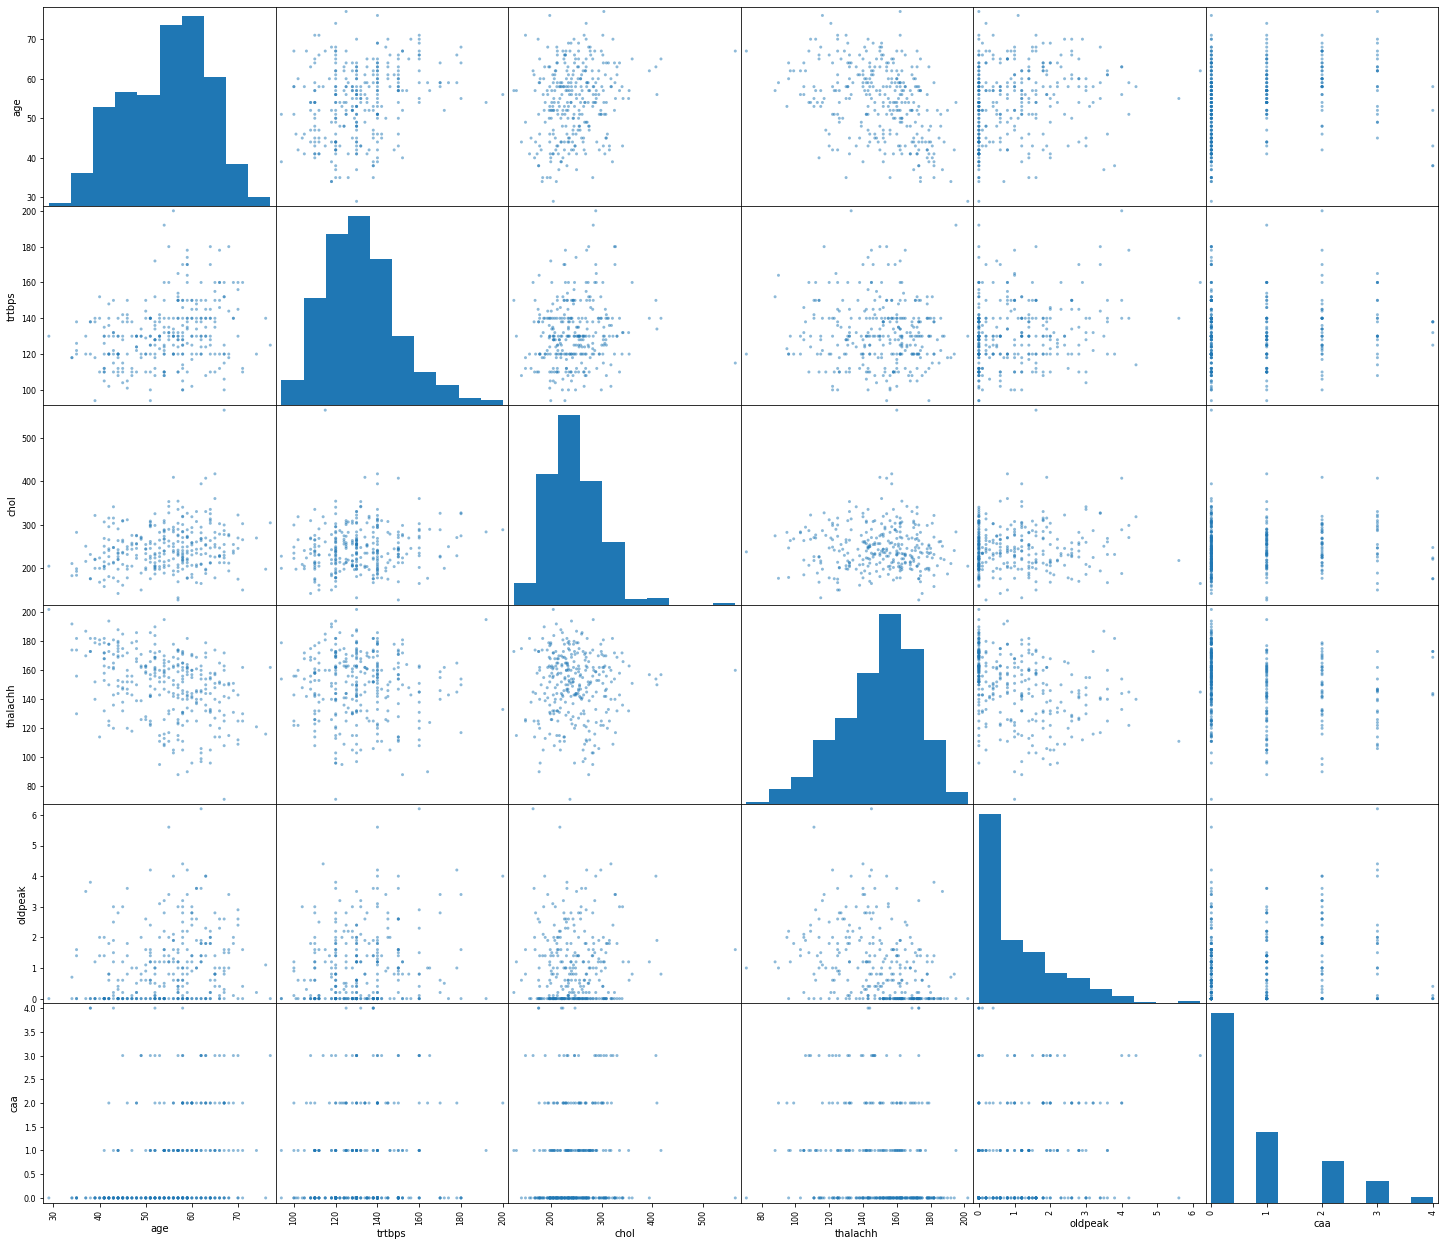

In [58]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df[num_var],figsize=(25,22))
plt.show()

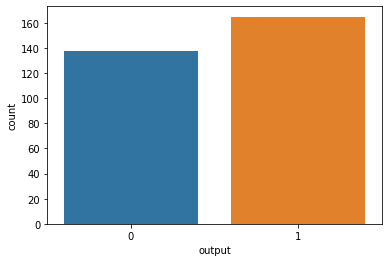

In [59]:
sns.countplot(x="output",data = df)
plt.show()

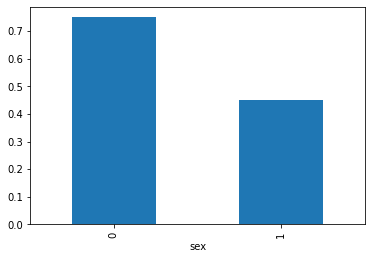

In [60]:
## Explore target across categorical variables:
# Bar Chart by Gender
# We assume that 0= Male and 1= female
import matplotlib.pyplot as plt
df_gender=df.groupby('sex')['output'].mean()  
df_gender.plot(kind='bar')
plt.show()

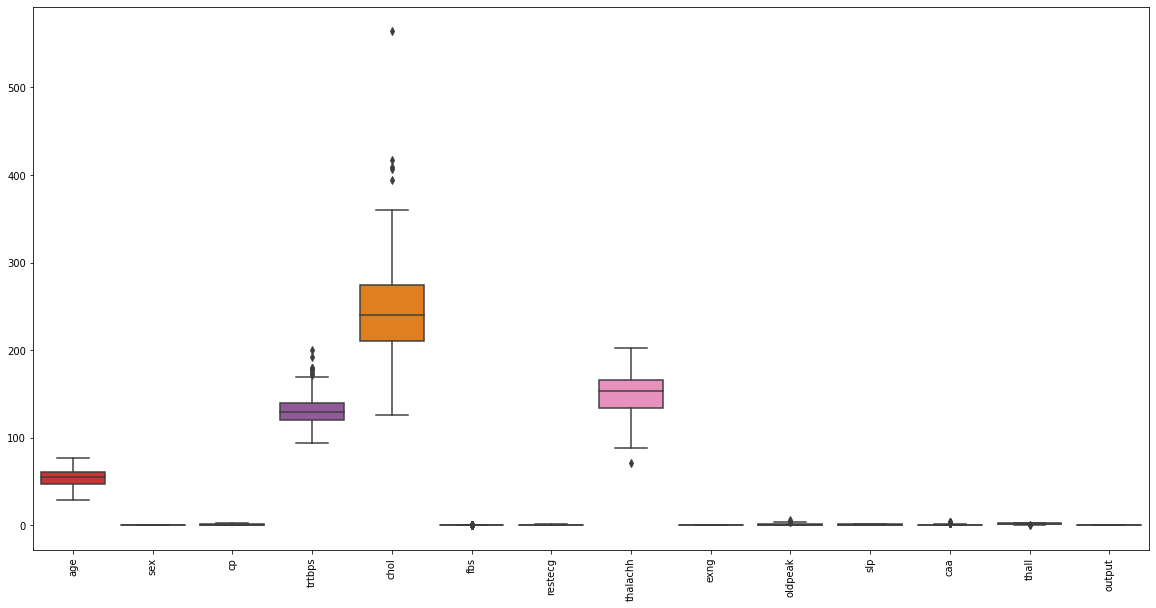

In [61]:
# Data desription to show outliers

plt.figure(figsize=(20,10))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [62]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()

    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************')
    
    df = df1.copy()

    return df

In [63]:
df = removeOutlier(df.trtbps, df)
df = removeOutlier(df.chol, df)
df

lowerbound:  79.00933393568636  -------- upperbound:  184.23819081678892
2  number of outliers from  303
 ******************************************************
lowerbound:  90.29311096799373  -------- upperbound:  401.7135335502787
4  number of outliers from  301
 ******************************************************


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


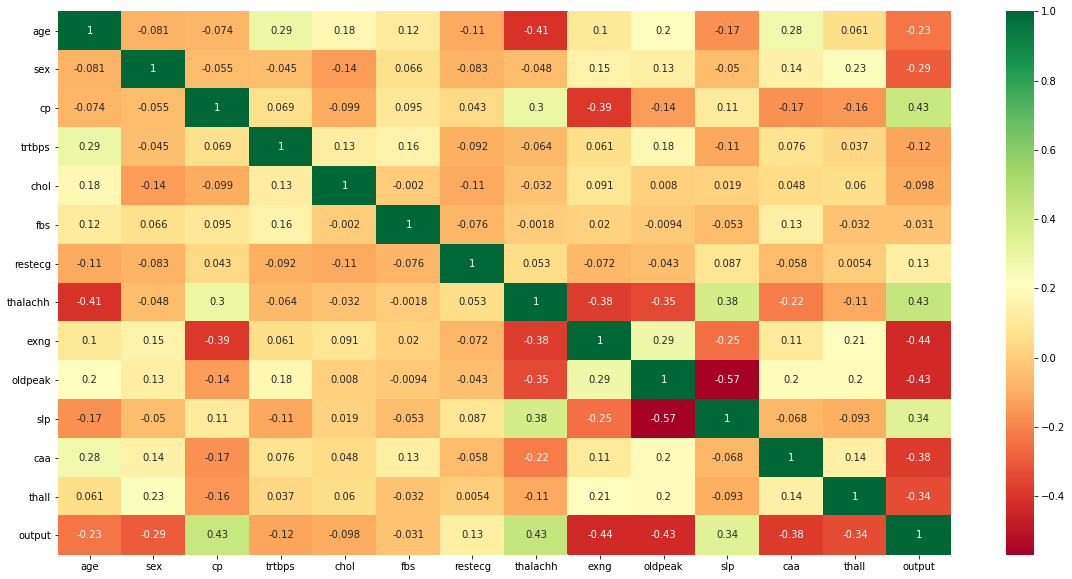

In [64]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
g = sns.heatmap(df[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

In [65]:
df.output.value_counts()

1    163
0    134
Name: output, dtype: int64

In [66]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = df[df.output==1]
df_2 = df[df.output==0]
 
# Upsample minority class
df_upsample_1 = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=163,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_upsample_1])
 
# Display new class counts
df_upsampled.output.value_counts()

1    163
0    163
Name: output, dtype: int64

In [67]:
x = df_upsampled.drop('output', axis = 1)
y = df_upsampled['output'] 

In [68]:
from sklearn.model_selection import train_test_split as tts

x_train,x_test, y_train, y_test = tts(x,y, test_size = 0.2, random_state = 111)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [24]:
# Import ML Libraries
!pip install catboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

classifiers = [[CatBoostClassifier(verbose=0),'CatBoost Classifier'], [RandomForestClassifier(),'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SVC(),'SVC'],[DecisionTreeClassifier(),'Decision Tree Classifier'],[LogisticRegression(),'Logistic Regression']]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [25]:
for cls in classifiers:
    model = cls[0]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(cls[0])
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)


Confusion Matrix:
[[26  1]
 [ 2 37]]
Accuracy :  95.45454545454545
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Confusion Matrix:
[[25  2]
 [ 7 32]]
Accuracy :  86.36363636363636
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Confusion Matrix:
[[24  3]
 [ 6 33]]
Accuracy :  86.36363636363636
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verb

In [26]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(221)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
keras_model = Sequential()
keras_model.add(Dense(100, activation='relu', input_dim=13))
keras_model.add(BatchNormalization())
#keras_model.add(Dense(80, activation='relu'))
#keras_model.add(Dropout(0.2))
keras_model.add(Dense(40, activation='relu'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(1, activation='sigmoid'))

keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
keras_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6301 - accuracy: 0.6577
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.7885
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3917 - accuracy: 0.8115
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8346
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3451 - accuracy: 0.8731
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3356 - accuracy: 0.8731
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2984 - accuracy: 0.8731
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.8654
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2612 - accuracy: 0.9115
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2555 - accuracy: 0.8923
Epoch 11/100
9/9 [===========

In [27]:
eval_results = keras_model.evaluate(x_test,y_test, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], \
  eval_results[1]*100))


Loss, accuracy on test data: 
0.2142 93.94%


In [70]:
lr_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lr_model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print ('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)


Confusion Matrix:
[[26  1]
 [ 2 37]]
Accuracy :  95.45454545454545


In [83]:
len(lis[0])

13

Text(0.5, 1.0, 'Feature Importance')

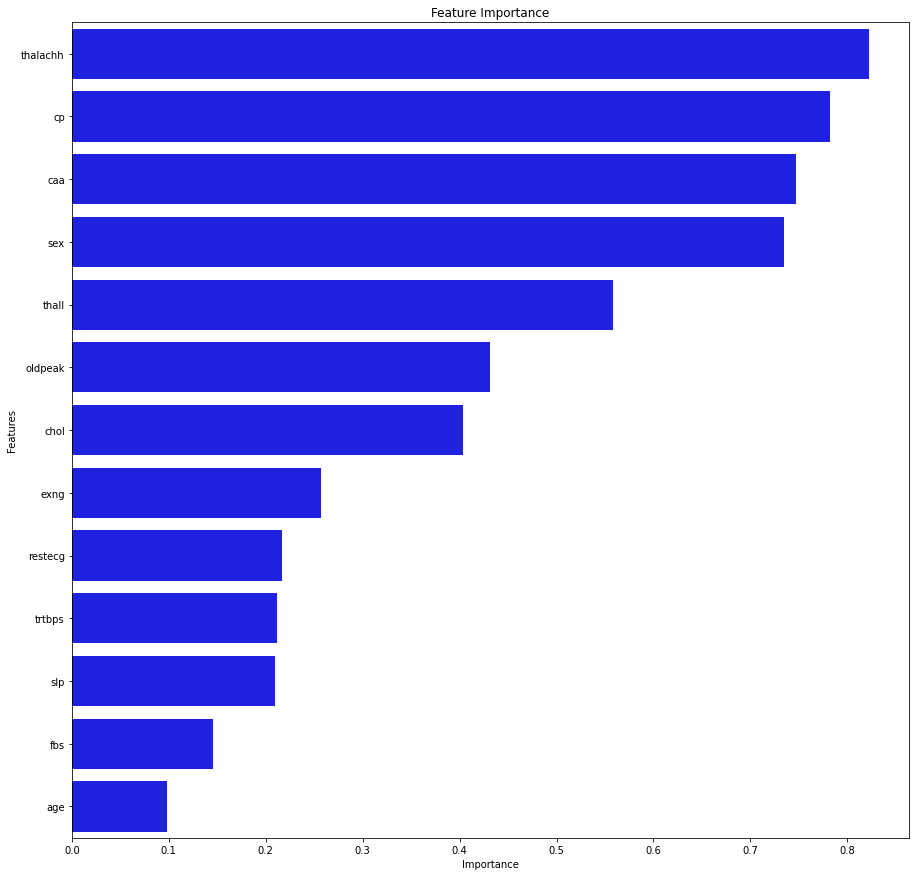

In [85]:
importance= lr_model.coef_

import seaborn as sns
import matplotlib.pyplot as plt
lis = []
# summarize feature importance
for i,v in enumerate(importance):
    lis.append(v)
lis = [abs(x) for x in lis]
X = df_upsampled.drop('output', axis = 1)
dic = {"Features":X.columns, 'Importance':lis[0]}
df = pd.DataFrame(dic)

plo=df.sort_values('Importance', ascending=False)
plt.subplots(1,figsize=(15,15))
sns.barplot(data=plo, y='Features', x='Importance', color='blue').set_title('Feature Importance')

### Converting the Model to Apple’s Core ML Format

See here for list of models that can be converted to MLCore format: https://likedan.github.io/Awesome-CoreML-Models/

In [29]:
pip install coremltools

In [30]:
#downgrade sklearn to a version supported by ML Core
!pip install --force-reinstall 'scikit-learn==0.19.2' 

In [31]:
import coremltools

In [32]:
input_features = list(x.columns)

In [33]:
#Convert best performing model, Random Forest to CoreML format
coreml_model = coremltools.converters.sklearn.convert(lr_model, input_features, 'class')

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [34]:
# set the model metadata
coreml_model.author = 'MavenCode'

coreml_model.short_description = "Heart Failure Prediction model"
coreml_model.output_description["class"] = "Likelihood of having a heart failure, 1 for 'likely', 0 for not 'likely'"

In [35]:
# Save the model
coreml_model.save("HeartFailure_LogisticRegressionModel.mlmodel")

### Model Prediction


After converting a source model to a Core ML model, you can evaluate the Core ML model by verifying that the predictions made by the Core ML model match the predictions made by the source model.

The following example makes predictions for the HeartFailure_LogisticRegressionModel.mlmodel using the predict() method.

### Note: For the prediction API, coremltools interacts with the Core ML framework which is available on macOS only

see link for more info: https://coremltools.readme.io/docs/model-prediction

In [36]:
# Load a saved model
loaded_model = coremltools.models.MLModel("HeartFailure_LogisticRegressionModel.mlmodel")

In [37]:
#predictions = loaded_model.predict(x_test)

We now have a new file named HeartFailure_LogisticRegressionModel.mlmodel. This is the Core ML model file that you can drop into Xcode!

### Using the model with Xcode

Double-click the newly converted HeartFailure_LogisticRegressionModel.mlmodel file in the Mac Finder to launch Xcode and open the model information pane.

see Xcode documentation here: https://developer.apple.com/documentation/xcode

### Converting the Model to TensorflowLite Format for Android devices

##### Note: TensorFlow Lite is used to convert and run **TensorFlow** models on mobile, embedded, and IoT devices.
So even though the Logistic Regression is our best performing model, we're converting the keras because random forest is not supported by TFLiteConverter

See supported models: https://www.tensorflow.org/lite/guide/get_started#2_convert_the_model_format

In [38]:
pip install tflite

In [39]:
pip install tensorflow==2.3.0

In [40]:
# Convert the keras model to tensorflow lite format
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

In [41]:
# Save the model.
with open('HeartFailurePrediction_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [42]:
#output_probs = tf.math.softmax(output_data)

### Run inference with the model

Inference is the process of running data through a model to obtain predictions. It requires a model, an interpreter, and input data.

Note:It's a good idea to always test the tflite model after conversion and before putting it on Android. So that if it doesn't work on your Android app, it’ll be clear that the problem is from your Android code not the ML model.

In [43]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/HeartFailurePrediction_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)


#Source: https://www.tensorflow.org/lite/guide/inference

[[0.04137331]]


In [44]:
##Note: The output is in probabilities

### Implementing the tflite model on Android
Now we are ready to implement the tflite model on Android. The first step is to create a new Android project on Android Studio